M03S25 - Time Series Visualization

OBJECTIVES: 
* Understand different kinds of trends in time series data
* Visualize trends in time series data
* Decompose time series data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
#LOAD DATASETS

# airline passenger traffic
passengers = pd.read_csv('international-airline-passengers.csv', header=0)

# stock data 
nyse = pd.read_csv('NYSE_monthly-Copy1.csv', header=0)

# generated sales data 
years = pd.date_range('2012-01', periods=72, freq="M")
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
sales = pd.Series(sales+bigger+6, index=index)

LOAD TIME SERIES DATA
1. Convert to datetime object
2. Set index to datetime object

In [6]:
passengers = passengers.dropna()
passengers['Month'] = pd.to_datetime(passengers['Month'], format='%Y-%m')

In [7]:
passengers.columns = (['Month', 'Passenger Volume'])
passengers.set_index('Month', inplace=True)
# passengers.info

In [19]:
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse[0:5]

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


In [24]:
sales

2012-01-31     5
2012-02-29     4
2012-03-31     4
2012-04-30     6
2012-05-31     2
2012-06-30     6
2012-07-31     9
2012-08-31     5
2012-09-30     9
2012-10-31     7
2012-11-30     6
2012-12-31     4
2013-01-31     4
2013-02-28     3
2013-03-31    10
2013-04-30    10
2013-05-31     7
2013-06-30     9
2013-07-31     6
2013-08-31    10
2013-09-30    12
2013-10-31    10
2013-11-30     7
2013-12-31    10
2014-01-31    12
2014-02-28     9
2014-03-31     5
2014-04-30    12
2014-05-31     6
2014-06-30    12
              ..
2015-07-31    10
2015-08-31    19
2015-09-30    13
2015-10-31    16
2015-11-30    17
2015-12-31    20
2016-01-31    16
2016-02-29    19
2016-03-31    18
2016-04-30    18
2016-05-31    20
2016-06-30    27
2016-07-31    26
2016-08-31    20
2016-09-30    27
2016-10-31    23
2016-11-30    25
2016-12-31    27
2017-01-31    24
2017-02-28    23
2017-03-31    31
2017-04-30    33
2017-05-31    35
2017-06-30    32
2017-07-31    35
2017-08-31    38
2017-09-30    41
2017-10-31    

PLOTTING TIME SERIES DATA

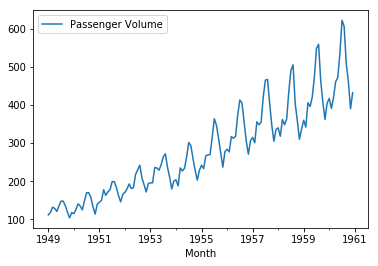

In [8]:
passengers.plot()
plt.show();

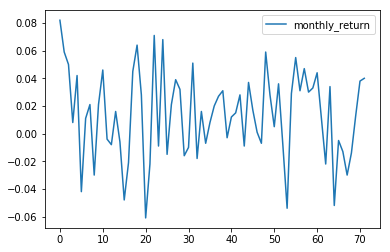

In [9]:
nyse.plot()
plt.show();

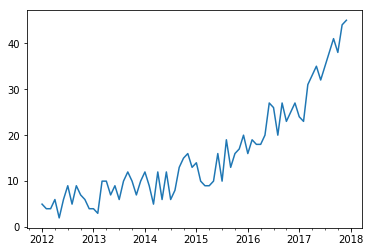

In [10]:
sales.plot()
plt.show();

What other kinds of plots can we make with these data sets? Why might they be useful?

scatter plots - easier to spot outliers

boxplot - easier to see outliers, trends, and statistical information

heatmap - can represent trends by multiple time intervals

histogram - check normality/WHY NOT?!?!, can easily inspect different time intervals with bins

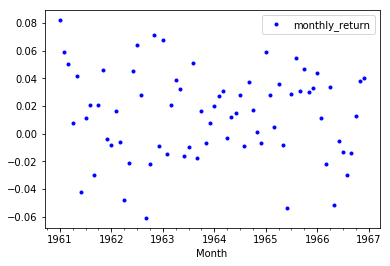

In [31]:
nyse.plot(style='.b')
# nyse.plot(x=nyse.iloc[0],y=nyse.iloc[1],kind='scatter')
# plt.scatter(x=nyse['Month'],y=nyse['monthly_return'])
plt.show();

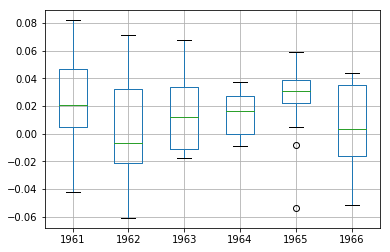

In [36]:
# Use pandas grouper to group values using annual frequency
year_groups = nyse.groupby(pd.Grouper(freq ='A'))

#Create a new DataFrame and store yearly values in columns 
nyse_annual = pd.DataFrame()

for yr, group in year_groups:
    nyse_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
# nyse_annual.plot(figsize = (13,8), subplots=True, legend=True)
# plt.show()

nyse_annual.boxplot()
plt.show();

In [41]:
year_groups.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042
1962-01-01,-0.008
1962-02-01,0.016
1962-03-01,-0.006
1962-04-01,-0.048


TRENDS

stationarity - mean and variance are constant over time

Trends...

linear - increasing/decreasing in straight line

exponential - bitcoin chart :P

periodic - cyclical fluctuations

changing variance - variance increasing/decreasing over time

ROLLING STATISCS AND DICKEY-FULLER TEST

In [50]:
# calculate rolmean and rolstd for generated data for rolling statistics plot
rolmean = sales.rolling(window=6,center=False).mean()
rolstd = sales.rolling(window=6, center=False).std()

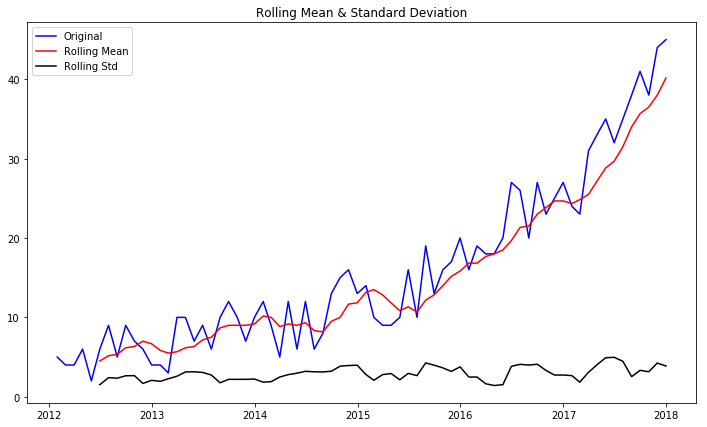

In [51]:
fig = plt.figure(figsize=(12,7))
orig = plt.plot(sales, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Dickey-Fuller test: stationality test

Ho - data is not stationary

In [52]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(sales)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(3.761375741674094, 1.0, 8, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, 314.84474355172597)


In [53]:
print ('Results of Dickey-Fuller Test:')

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  3.761376
p-value                         1.000000
#Lags Used                      8.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


TRANSFORMS TO REDUCE SEASONALITY

1. Subtract rolling mean
2. Subtract exponentially weighted rolling mean .ewm()
3. Differencing

TIME SERIES DECOMPOSITION

additive decomposition - 

multiplicative decomposition - 

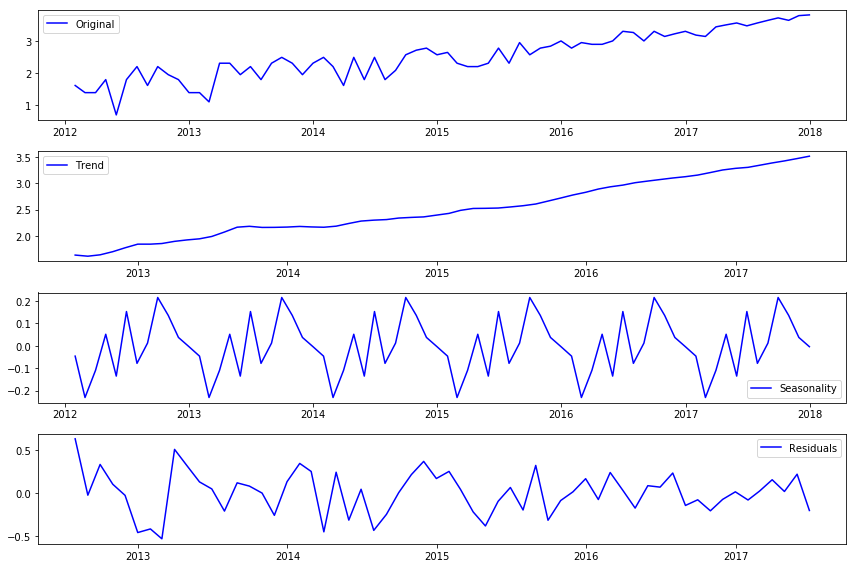

In [54]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(sales))

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(sales), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Import the check_stationarity
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['#Passengers']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

In [56]:
# Drop NaN values from residuals.
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(ts_log_decompose)

KeyError: '#Passengers'